In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


from pathlib import Path
from glob import glob

from matplotlib import rcParams

config = {
    "font.size": 22,
    "pgf.texsystem": "pdflatex",
    "font.family": "serif",
    "text.usetex": True,
}
rcParams.update(config)

In [2]:
# %matplotlib qt
%matplotlib inline

In [3]:
# path = 'Z:\\lnls\\beamlines\\paineira\\proposals\\20240869\\proc\\pimega_450d\\2024\\april\lstn_650_h2flow_pc\\final_aggregate_files\\*_RAMP_*.csv'
path = "final_aggregate_files/*_RAMP_*.csv"
files = glob(path, recursive=True)
files[0:5]

['final_aggregate_files\\LSTN_650_H2blow_pC_RAMP_100Celsius_161_MERGE.csv',
 'final_aggregate_files\\LSTN_650_H2blow_pC_RAMP_109Celsius_163_MERGE.csv',
 'final_aggregate_files\\LSTN_650_H2blow_pC_RAMP_114Celsius_165_MERGE.csv',
 'final_aggregate_files\\LSTN_650_H2blow_pC_RAMP_118Celsius_167_MERGE.csv',
 'final_aggregate_files\\LSTN_650_H2blow_pC_RAMP_124Celsius_169_MERGE.csv']

In [4]:
df = pd.DataFrame(files, columns=["file_path"])
df.head()

,file_path
0,final_aggregate_files\LSTN_650_H2blow_pC_RAMP_...
1,final_aggregate_files\LSTN_650_H2blow_pC_RAMP_...
2,final_aggregate_files\LSTN_650_H2blow_pC_RAMP_...
3,final_aggregate_files\LSTN_650_H2blow_pC_RAMP_...
4,final_aggregate_files\LSTN_650_H2blow_pC_RAMP_...


In [5]:
def fix_temp(x):
    if x <= 124.9:
        return x
    else:
        x = x + 273.15
        x = (x - 85.28) / 1.0593
        return x - 273.15

In [6]:
df["file_path"] = df["file_path"].apply(Path)
df["file_name"] = df["file_path"].apply(lambda x: x.name)
df["temp"] = (
    df["file_name"].str.split("RAMP_").str[-1].str.split("Cel").str[0].astype(float)
)
df["fixed_temp"] = df["temp"].apply(fix_temp)
df["data"] = df["file_path"].apply(lambda x: pd.read_csv(x))  # Takes like 24 s

In [7]:
df = (
    df.sort_values(by="fixed_temp", ascending=True)
    .query("fixed_temp>=124.9")
    .reset_index(drop=True)
)

In [8]:
len(df)

120

In [9]:
step = 2
df_step = pd.DataFrame()
for i in range(0, len(df), step):
    df_step = pd.concat([df_step, pd.DataFrame(df.iloc[i]).T]).reset_index(drop=True)
len(df), len(df_step)

(120, 60)

In [10]:
norm = mpl.colors.Normalize(
    vmin=df_step.fixed_temp.min(), vmax=df_step.fixed_temp.max()
)

In [11]:
cmap = plt.cm.get_cmap("turbo", len(df_step))

C:\Users\fisic\AppData\Local\Temp\ipykernel_7768\765854791.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('turbo', len(df_step))


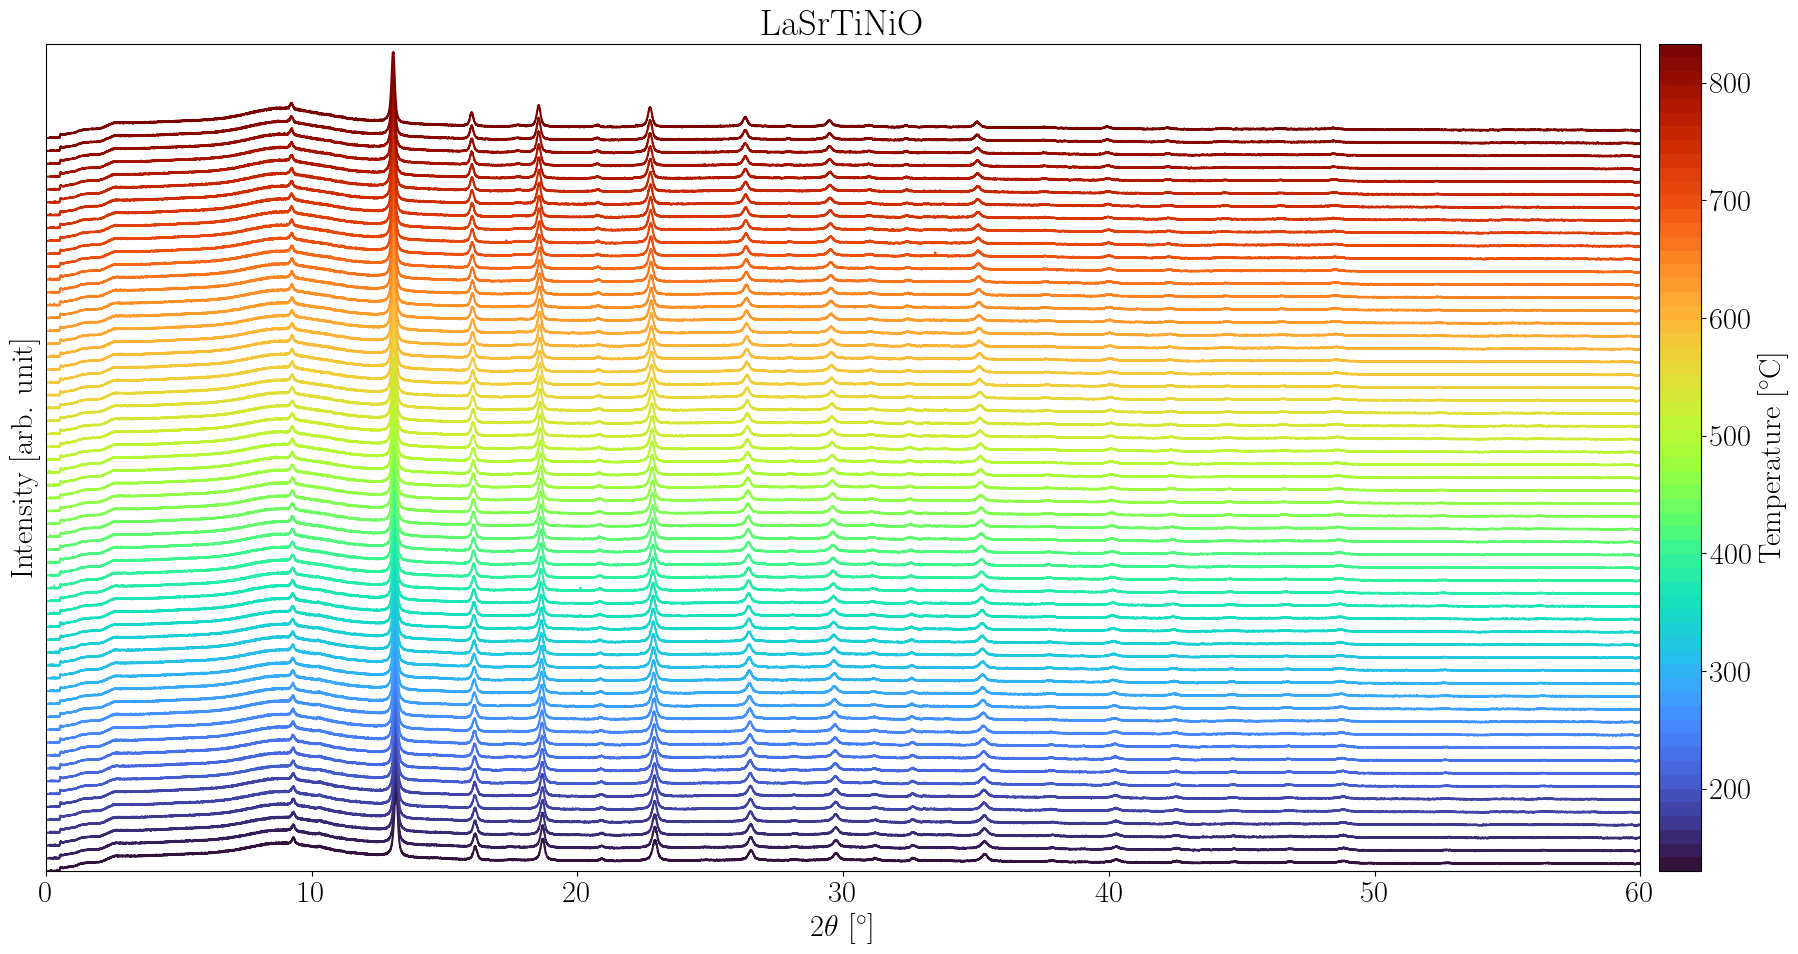

In [12]:
plt.figure(figsize=(20, 10))
y = 0
plt.title("LaSrTiNiO")
for i, n in enumerate(range(0, len(df), step)):
    if i == 54 or i == 47:
        pass
    else:
        temp = df.iloc[n]["fixed_temp"]
        data = df.iloc[n]["data"]
        temp = np.repeat(temp, len(data))
        theta = data["2theta (degree)"]
        intensity = data["Intensity"] / max(data["Intensity"]) + y
        y = y + 0.15
        plt.plot(theta, intensity, color=cmap(norm(temp[0])))
# plt.axvline(x=13.064832)
plt.xlim(0, 60)
plt.ylim(0, 9.65)
plt.yticks([])
plt.ylabel("Intensity [arb. unit]")  # [u.a]')
plt.xlabel(r"$2\theta$ [$^\circ$]")
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca(), pad=0.01)
cbar.ax.set_ylabel("Temperature [$^\circ$C]")
plt.tight_layout()
# plt.savefig('plot_1.png', dpi=300, transparent=True, bbox_inches = 'tight', pad_inches = 0)
plt.show()

In [13]:
df_0 = df.iloc[0]["data"]
df_0 = df_0[(df_0["2theta (degree)"] > 12) & (df_0["2theta (degree)"] < 24)]
df_0.head()


,2theta (degree),Intensity
3407,12.001190,1.429849e+09
3408,12.004712,1.428078e+09
3409,12.008234,1.435124e+09
3410,12.011756,1.436704e+09
3411,12.015278,1.376690e+09


In [14]:
data[(data["2theta (degree)"] > 13) & (data["2theta (degree)"] < 13.125)].sort_values(
    by="Intensity"
)

,2theta (degree),Intensity
3691,13.001436,4.599797e+09
3692,13.004958,4.730075e+09
3726,13.124706,4.745695e+09
3693,13.008480,4.945064e+09
3725,13.121184,4.970039e+09
3724,13.117662,5.125194e+09
3694,13.012002,5.144906e+09
3695,13.015524,5.225133e+09
3723,13.114140,5.297275e+09
3722,13.110618,5.460950e+09


In [15]:
def get_max(df, min_val, max_val):
    df = df[
        (df["2theta (degree)"] > min_val) & (df["2theta (degree)"] < max_val)
    ].sort_values(by="Intensity")
    return df.iloc[-1]["2theta (degree)"]


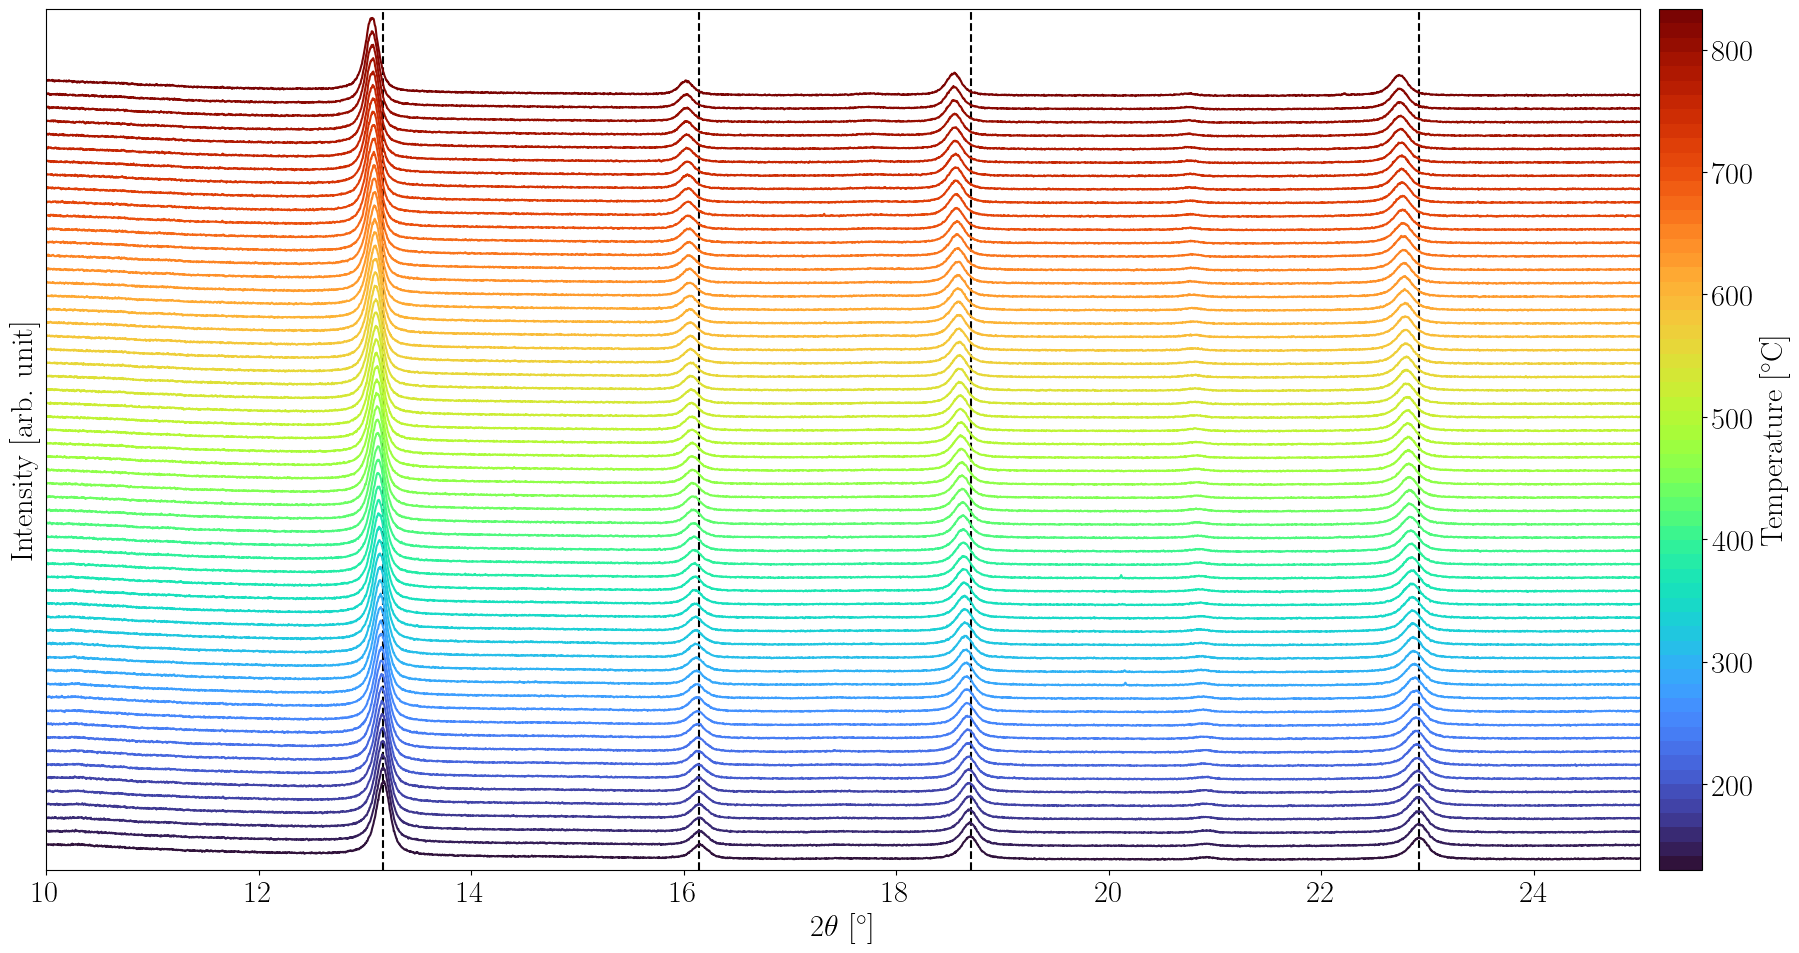

In [16]:
plt.figure(figsize=(20, 10))
y = 0
plt.axvline(
    get_max(df.iloc[0]["data"], min_val=18, max_val=20), color="black", ls="dashed"
)
plt.axvline(
    get_max(df.iloc[0]["data"], min_val=22, max_val=24), color="black", ls="dashed"
)
plt.axvline(
    get_max(df.iloc[0]["data"], min_val=15, max_val=17), color="black", ls="dashed"
)
plt.axvline(
    get_max(df.iloc[0]["data"], min_val=12, max_val=14), color="black", ls="dashed"
)
for i, n in enumerate(range(0, len(df), step)):
    if i == 54 or i == 47:
        pass
    else:
        temp = df.iloc[n]["fixed_temp"]
        data = df.iloc[n]["data"]
        temp = np.repeat(temp, len(data))
        theta = data["2theta (degree)"]
        intensity = data["Intensity"] / max(data["Intensity"]) + y
        y = y + 0.15
        plt.plot(theta, intensity, color=cmap(norm(temp[0])))
# plt.axvline(x=13.064832)
plt.xlim(10, 25)
plt.ylim(0, 9.65)
plt.yticks([])
plt.ylabel("Intensity [arb. unit]")  # [u.a]')
plt.xlabel(r"$2\theta$ [$^\circ$]")
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca(), pad=0.01)
cbar.ax.set_ylabel("Temperature [$^\circ$C]")
plt.tight_layout()
# plt.savefig('plot_2.png', dpi=300, transparent=True, bbox_inches = 'tight', pad_inches = 0)
plt.show()
